In [3]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay , classification_report , accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

In [9]:
df = pd.read_csv('/content/Default_Fin.csv')
df.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [10]:
df.drop(columns=['Index'] , axis=1 ,inplace= True)
df.head()

,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0


In [11]:
print(f"The shape of the Data Frame is: {df.shape}")

The shape of the Data Frame is: (10000, 4)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Employed       10000 non-null  int64  
 1   Bank Balance   10000 non-null  float64
 2   Annual Salary  10000 non-null  float64
 3   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 312.6 KB


In [13]:
df.describe()

,Employed,Bank Balance,Annual Salary,Defaulted?
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.705600,10024.498524,402203.782224,0.033300
std,0.455795,5804.579486,160039.674988,0.179428
min,0.000000,0.000000,9263.640000,0.000000
25%,0.000000,5780.790000,256085.520000,0.000000
50%,1.000000,9883.620000,414631.740000,0.000000
75%,1.000000,13995.660000,525692.760000,0.000000
max,1.000000,31851.840000,882650.760000,1.000000


In [14]:
df.duplicated().sum()

0

In [15]:
df.isna().sum()

Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

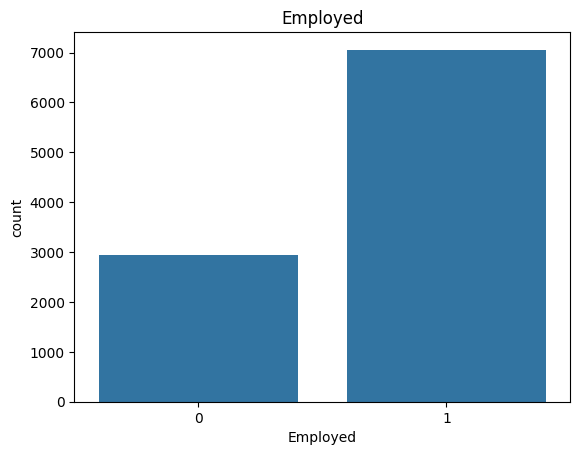

In [16]:
sns.countplot(x=df['Employed'])
plt.title('Employed');

In [18]:
correlation = df.corr()

<Axes: >

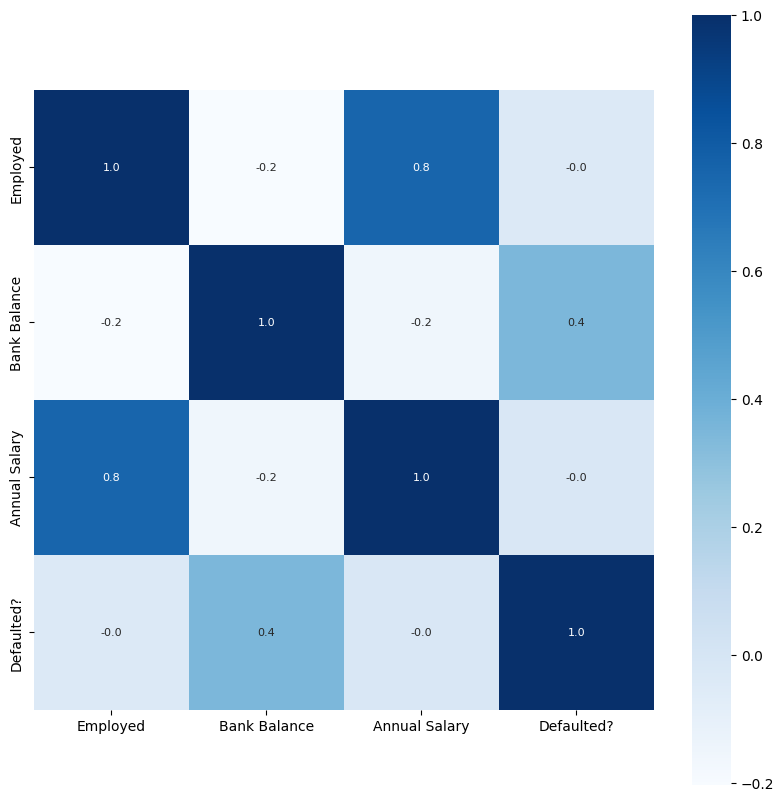

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [20]:
target= 'Defaulted?'
X= df.drop(columns=[target])
y= df[target]
print(f'X Shape {X.shape}')
print(f'y Shape {y.shape}')

X Shape (10000, 3)
y Shape (10000,)


In [21]:
X_test , X_train , y_test , y_train = train_test_split(X,y,test_size= 0.2 , random_state= 42)

In [22]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2000, 3)
y_train shape: (2000,)
X_test shape: (8000, 3)
y_test shape: (8000,)


In [23]:
def train(model , model_name):
    model.fit(X_train, y_train)
    print(f'training accuracy of {model_name} is: {model.score(X_test , y_test)}')
    print(f'testing accuracy of {model_name} is: {model.score(X_test , y_test)}')
def conf_matrix(model):
    ConfusionMatrixDisplay.from_estimator(
        svm_model,
        X_test,
        y_test
    )
def class_report(model):
    print(classification_report(y_test , model.predict(X_test)))

In [24]:
svm_model= make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    MinMaxScaler(),
    SVC(kernel='linear')
)

In [25]:
train(svm_model , "SVC" )

training accuracy of SVC is: 0.967
testing accuracy of SVC is: 0.967


In [27]:
class_report(svm_model)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      7736
           1       0.00      0.00      0.00       264

    accuracy                           0.97      8000
   macro avg       0.48      0.50      0.49      8000
weighted avg       0.94      0.97      0.95      8000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
